In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = sns.load_dataset('mpg')

In [3]:
X = df[['horsepower', 'weight']]
y = df['mpg']

# Create Pipeline with SimpleImputer and LinearRegression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(SimpleImputer(), LinearRegression())

pipeline.fit(X, y)

Pipeline(memory=None,
     steps=[('simpleimputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [5]:
print("intercept: {}".format(pipeline.named_steps['linearregression'].intercept_))
print("slope: {}".format(pipeline.named_steps['linearregression'].coef_))

intercept: 45.84151777419887
slope: [-0.04390364 -0.00597233]


In [6]:
pipeline.score(X, y)

0.703736486959471

# Prediction
## Example

In [7]:
df_prediction = pd.DataFrame([[120, 2700], [120, 2800], [200, 3600]])
pipeline.predict(df_prediction)

array([24.44778768, 23.85055461, 15.56039857])

## The pipeline can handle NaNs

In [8]:
df_prediction = pd.DataFrame([[120, 2700], [np.NaN, 2800], [200, np.NaN]])
pipeline.predict(df_prediction)

array([24.44778768, 24.53240507, 19.32043092])

# Visualization

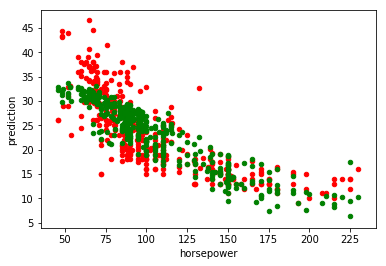

In [9]:
df_viz = df.copy()
df_viz['prediction'] = pipeline.predict(X)
ax1 = df_viz.plot(kind='scatter', x='horsepower', y='mpg', color='r')    
ax2 = df_viz.plot(kind='scatter', x='horsepower', y='prediction', color='g', ax=ax1)
plt.show()

<IPython.core.display.Javascript object>


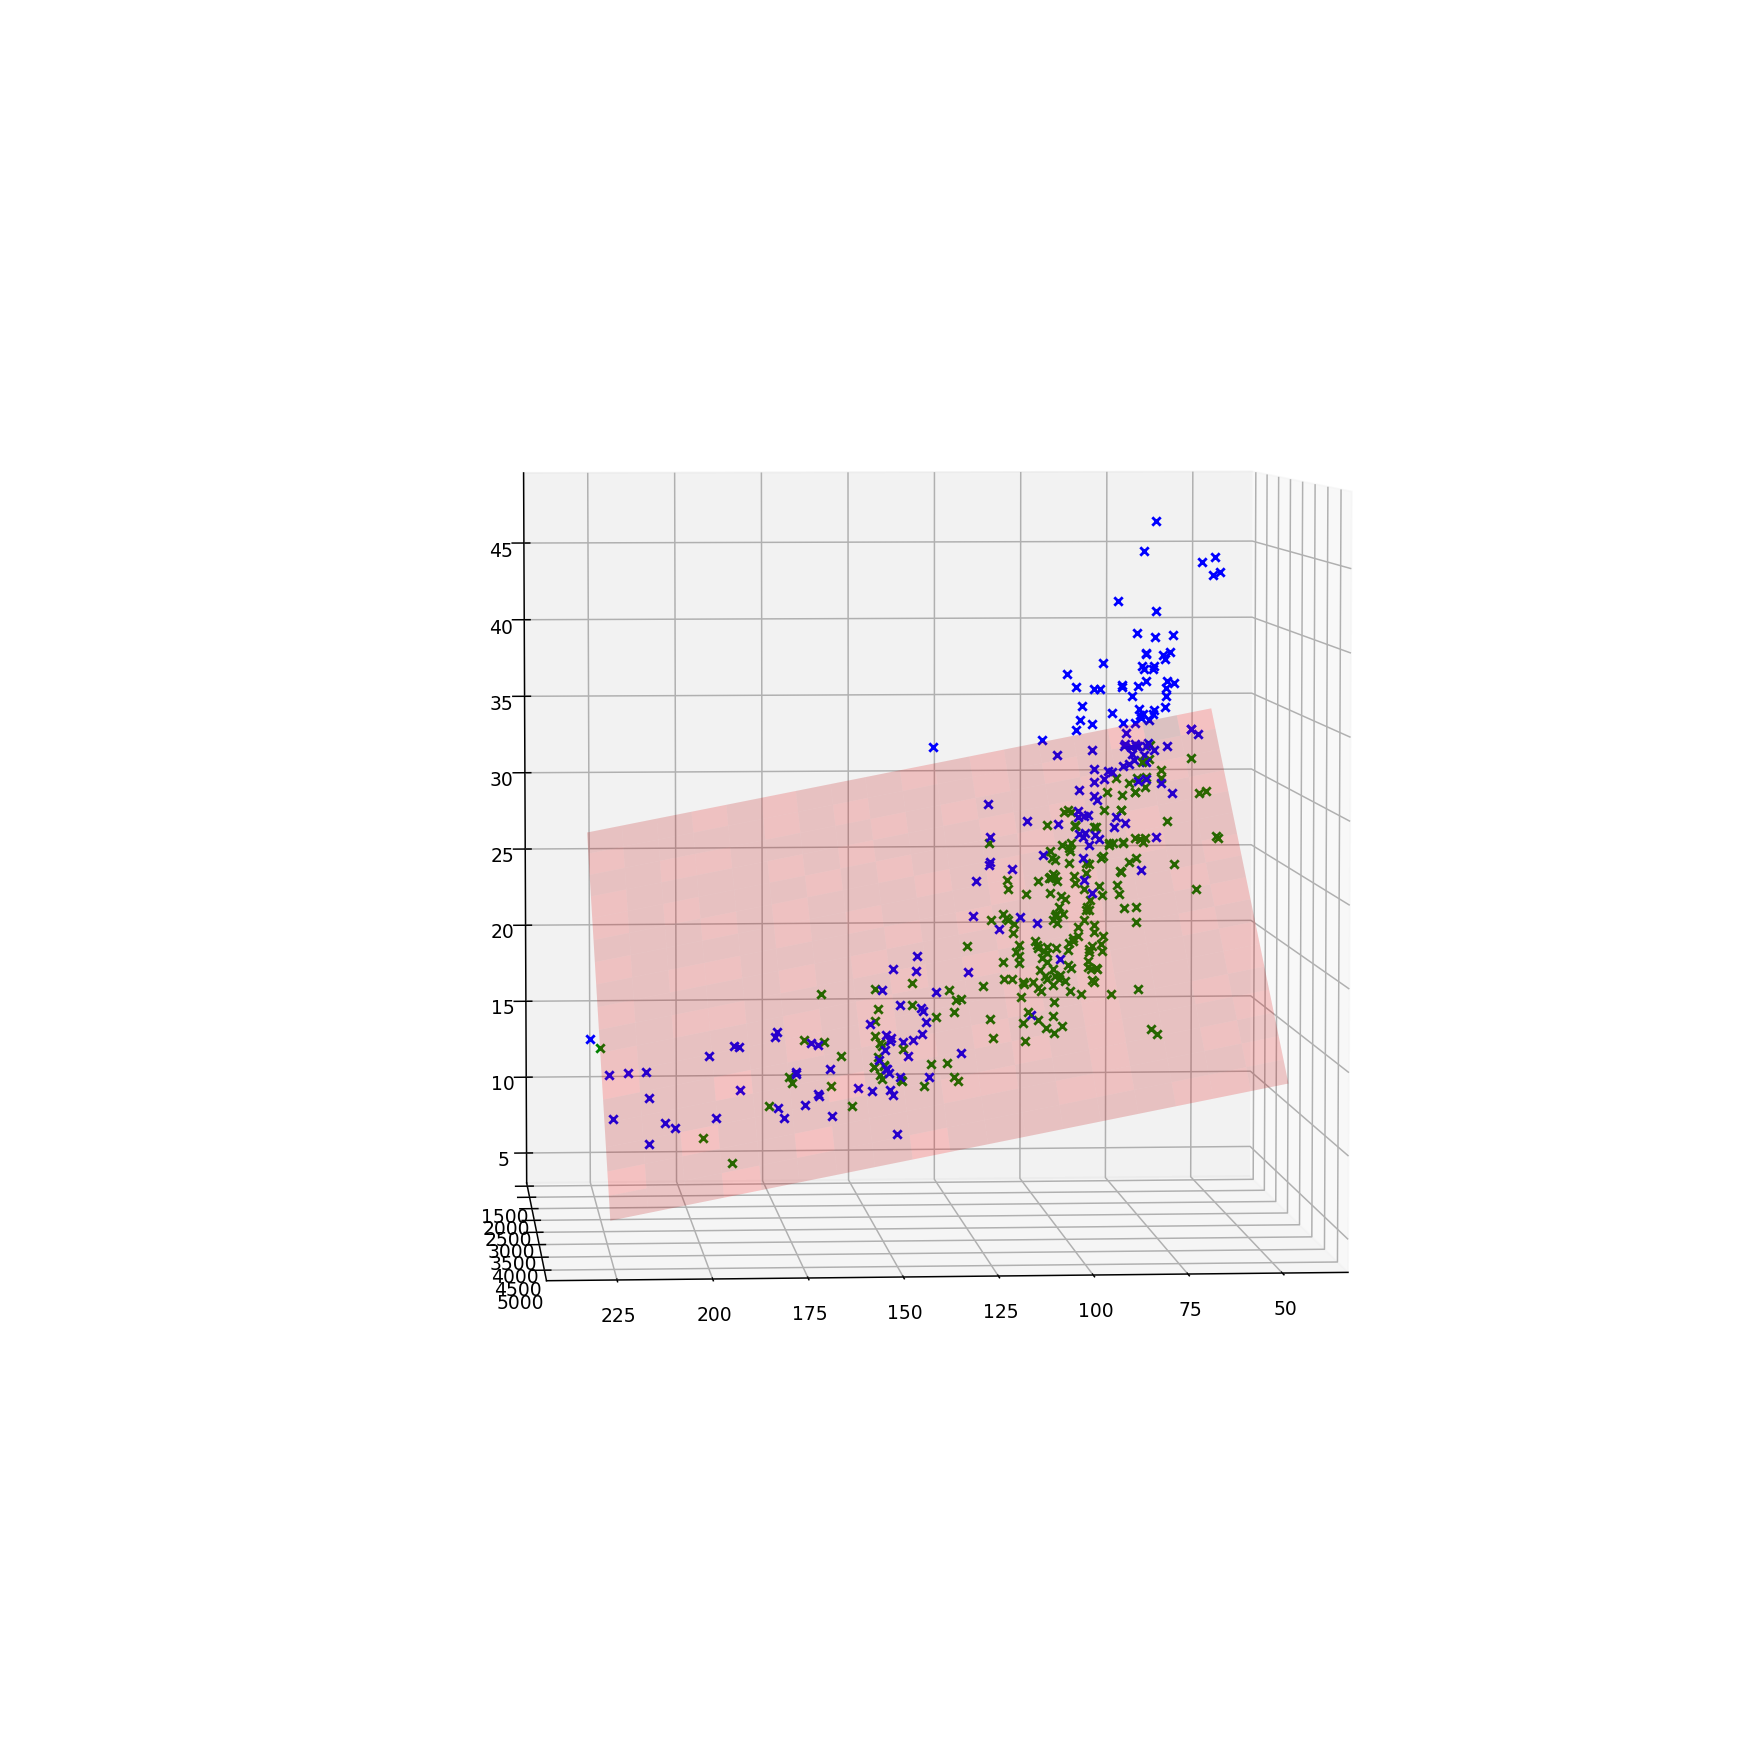

In [81]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(0, 30)

pred = pipeline.predict(X)

# plot data points
for i in range(0, len(y)):
    if (y[i]-pred[i]<0):
        ax.scatter(X.iloc[i,0], X.iloc[i,1], y[i], color='green', marker='x')
    else:
        ax.scatter(X.iloc[i,0], X.iloc[i,1], y[i], color='blue', marker='x')

    
# plot hyperplane
X0 = np.arange(min(X.iloc[:,0]), max(X.iloc[:,0]), 10)
X1 = np.arange(min(X.iloc[:,1]), max(X.iloc[:,1]), 200)
X0, X1 = np.meshgrid(X0, X1)
Z = X0.copy()
n = X0.shape[0]
m = X0.shape[1]
for i in range(0, n):
    for j in range(0, m):
        Z[i,j] = pipeline.predict([[X0[i,j], X1[i,j]]])

#ax.scatter(X0, X1, Z, color='red')
ax.plot_surface(X0, X1, Z, color='red', linewidth=0, antialiased=True, alpha=0.2)
#ax.plot_wireframe(X0, X1, Z, color='red', alpha=0.25)

ax.view_init(3, 60)
plt.show()